In [1]:
import glob
import sys

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
sys.path.append("../../../")

from helpers.experiment import experiment



Commencing Experiment: DecisionTreeClassifier_dataset_00_all

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.633372

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4025  0.8610    0.5486      374  0.5765
  genre_classical     0.9189  0.7700    0.8378     4221  0.7958
    genre_country     0.4619  0.9266    0.6165      327  0.6457
      genre_disco     0.4355  0.9689    0.6009      289  0.6418
     genre_hiphop     0.5247  0.7119    0.6041     1701  0.5611
       genre_jazz     0.4582  0.6898    0.5507     1241  0.5205
      genre_metal     0.6380  0.8827    0.7407      665  0.7390
        genre_pop     0.6728  0.3748    0.4814     4274  0.3927
     genre_reggae     0.4346  0.8008   

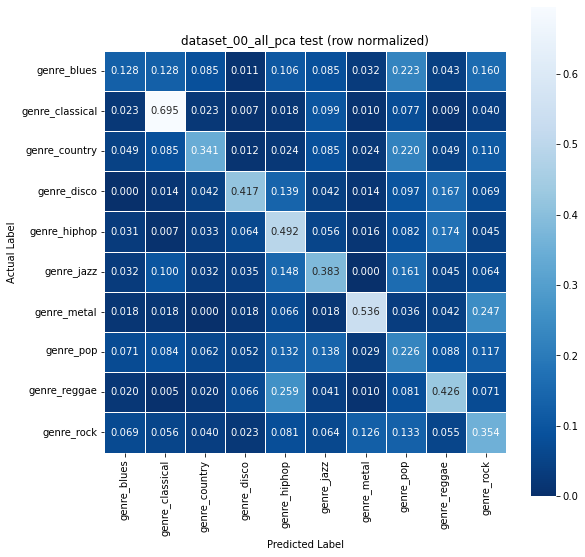



Commencing Experiment: DecisionTreeClassifier_dataset_01_mean

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.544087

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.3420  0.8476    0.4873      374  0.5239
  genre_classical     0.8959  0.7745    0.8307     4221  0.7839
    genre_country     0.3286  0.9266    0.4852      327  0.5395
      genre_disco     0.2281  0.8547    0.3601      289  0.4260
     genre_hiphop     0.5371  0.3698    0.4380     1701  0.3964
       genre_jazz     0.3952  0.6535    0.4926     1241  0.4592
      genre_metal     0.4301  0.8241    0.5652      665  0.5742
        genre_pop     0.7516  0.2817    0.4098     4274  0.3724
     genre_reggae     0.2461  0.7081  

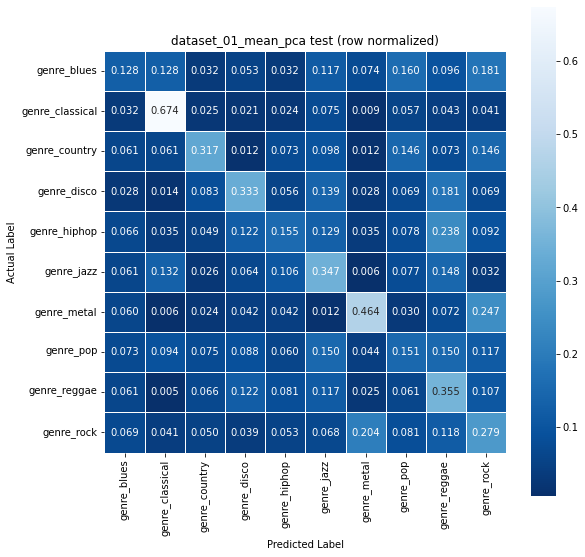



Commencing Experiment: DecisionTreeClassifier_dataset_02_mean_cov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.589227

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1959  0.8717    0.3199      374  0.3907
  genre_classical     0.8871  0.6849    0.7730     4221  0.7204
    genre_country     0.3986  0.8960    0.5518      327  0.5873
      genre_disco     0.3848  0.9308    0.5445      289  0.5893
     genre_hiphop     0.5575  0.6614    0.6050     1701  0.5597
       genre_jazz     0.4357  0.6986    0.5367     1241  0.5079
      genre_metal     0.4851  0.8541    0.6187      665  0.6257
        genre_pop     0.7439  0.3596    0.4849     4274  0.4228
     genre_reggae     0.5426  0.81

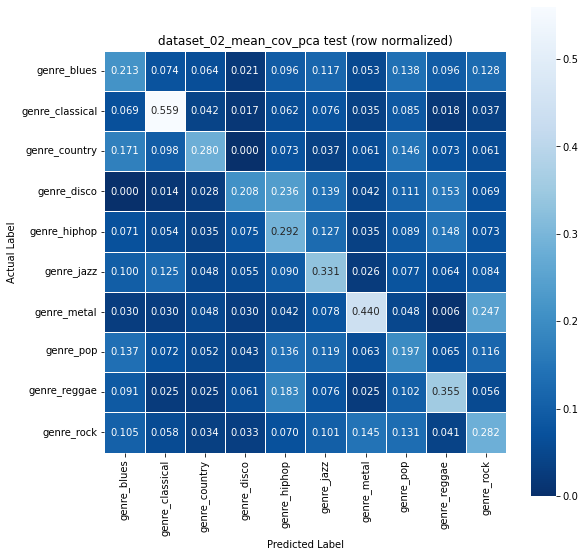



Commencing Experiment: DecisionTreeClassifier_dataset_03_mean_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.454333

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1802  0.6898    0.2857      374  0.3272
  genre_classical     0.8850  0.6420    0.7442     4221  0.6912
    genre_country     0.1720  0.8654    0.2870      327  0.3642
      genre_disco     0.1643  0.7924    0.2721      289  0.3406
     genre_hiphop     0.4921  0.3839    0.4313     1701  0.3804
       genre_jazz     0.3157  0.5761    0.4079     1241  0.3661
      genre_metal     0.3413  0.8135    0.4809      665  0.5000
        genre_pop     0.6408  0.2241    0.3321     4274  0.2793
     genre_reggae     0.3229  0.5

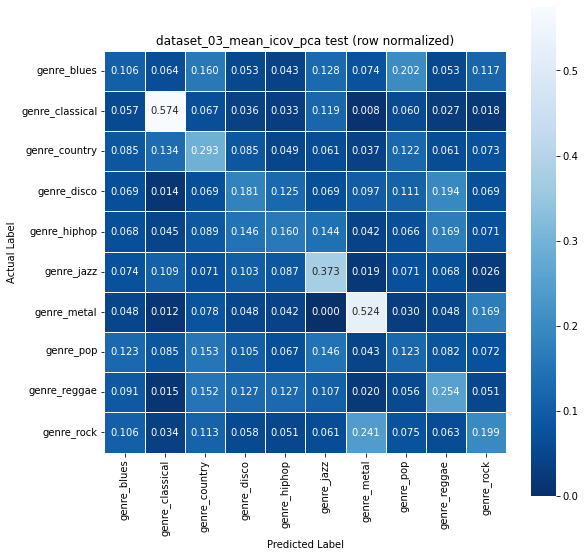



Commencing Experiment: DecisionTreeClassifier_dataset_04_mean_cov_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.583841

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2728  0.8717    0.4156      374  0.4702
  genre_classical     0.8606  0.6830    0.7616     4221  0.7025
    genre_country     0.3644  0.8960    0.5181      327  0.5600
      genre_disco     0.3096  0.9481    0.4668      289  0.5305
     genre_hiphop     0.5577  0.6226    0.5883     1701  0.5410
       genre_jazz     0.4124  0.6849    0.5148     1241  0.4849
      genre_metal     0.4686  0.8180    0.5958      665  0.5998
        genre_pop     0.7032  0.3570    0.4736     4274  0.3990
     genre_reggae     0.5722 

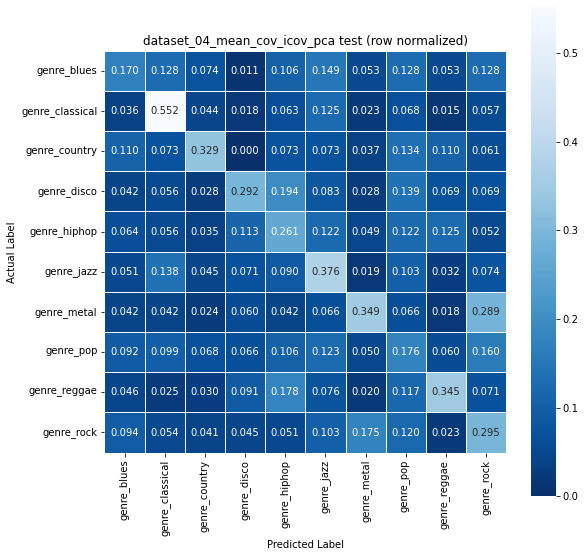



Commencing Experiment: DecisionTreeClassifier_dataset_05_pvtt

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.500351

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2154  0.6417    0.3226      374  0.3493
  genre_classical     0.9116  0.8403    0.8745     4221  0.8367
    genre_country     0.1494  0.7309    0.2481      327  0.3055
      genre_disco     0.1659  0.6090    0.2607      289  0.2972
     genre_hiphop     0.4831  0.2434    0.3237     1701  0.2943
       genre_jazz     0.3950  0.5439    0.4576     1241  0.4140
      genre_metal     0.3649  0.7880    0.4988      665  0.5105
        genre_pop     0.6760  0.2040    0.3134     4274  0.2809
     genre_reggae     0.2568  0.5863  

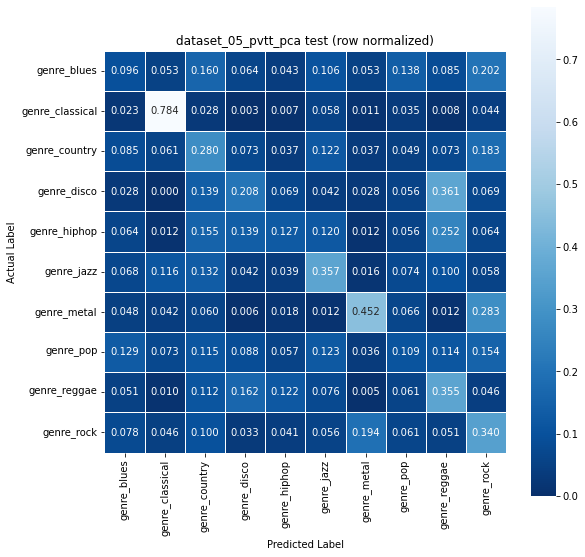



Commencing Experiment: DecisionTreeClassifier_dataset_06_pvtt_mean

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.570960

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2228  0.8583    0.3537      374  0.4166
  genre_classical     0.9367  0.8057    0.8663     4221  0.8306
    genre_country     0.3755  0.8624    0.5232      327  0.5577
      genre_disco     0.2607  0.9031    0.4047      289  0.4717
     genre_hiphop     0.4986  0.4045    0.4466     1701  0.3950
       genre_jazz     0.4169  0.6229    0.4995     1241  0.4628
      genre_metal     0.4426  0.8346    0.5784      665  0.5874
        genre_pop     0.6968  0.3140    0.4329     4274  0.3675
     genre_reggae     0.3641  0.7

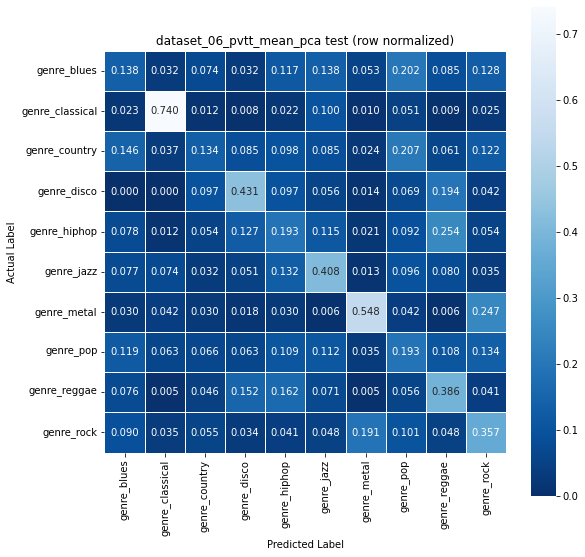



Commencing Experiment: DecisionTreeClassifier_dataset_07_pvtt_mean_cov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.642447

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.3040  0.9439    0.4599      374  0.5207
  genre_classical     0.9070  0.7351    0.8121     4221  0.7657
    genre_country     0.4042  0.9480    0.5667      327  0.6092
      genre_disco     0.3784  0.9689    0.5442      289  0.5964
     genre_hiphop     0.6960  0.6784    0.6871     1701  0.6531
       genre_jazz     0.4856  0.7317    0.5837     1241  0.5578
      genre_metal     0.5518  0.8887    0.6809      665  0.6858
        genre_pop     0.7265  0.4258    0.5370     4274  0.4559
     genre_reggae     0.5687 

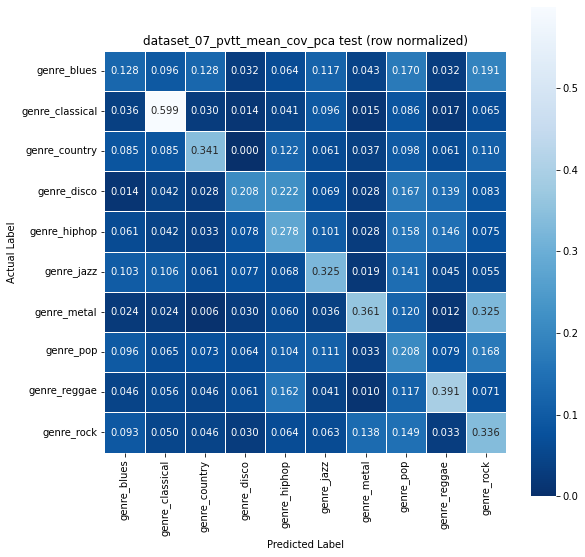



Commencing Experiment: DecisionTreeClassifier_dataset_08_pvtt_mean_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.525703

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2815  0.7353    0.4071      374  0.4369
  genre_classical     0.9060  0.8308    0.8668     4221  0.8269
    genre_country     0.1793  0.8165    0.2941      327  0.3612
      genre_disco     0.2745  0.7855    0.4068      289  0.4505
     genre_hiphop     0.4788  0.3592    0.4105     1701  0.3599
       genre_jazz     0.3443  0.6132    0.4410     1241  0.4035
      genre_metal     0.3726  0.8602    0.5200      665  0.5421
        genre_pop     0.7208  0.2120    0.3276     4274  0.3062
     genre_reggae     0.3339

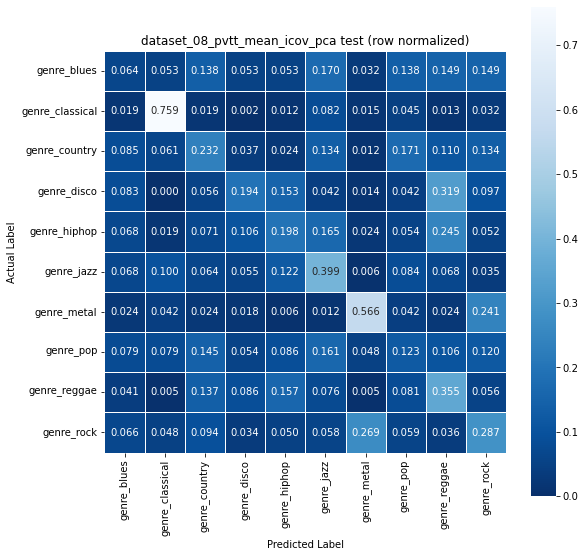



Commencing Experiment: DecisionTreeClassifier_dataset_09_pvtt_mean_cov_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.628162

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2745  0.9144    0.4222      374  0.4842
  genre_classical     0.9077  0.7475    0.8198     4221  0.7741
    genre_country     0.4107  0.9144    0.5668      327  0.6029
      genre_disco     0.3505  0.9654    0.5143      289  0.5718
     genre_hiphop     0.6007  0.7014    0.6471     1701  0.6070
       genre_jazz     0.4552  0.7172    0.5569     1241  0.5299
      genre_metal     0.5438  0.8677    0.6686      665  0.6717
        genre_pop     0.7534  0.3659    0.4926     4274  0.4321
     genre_reggae     0.

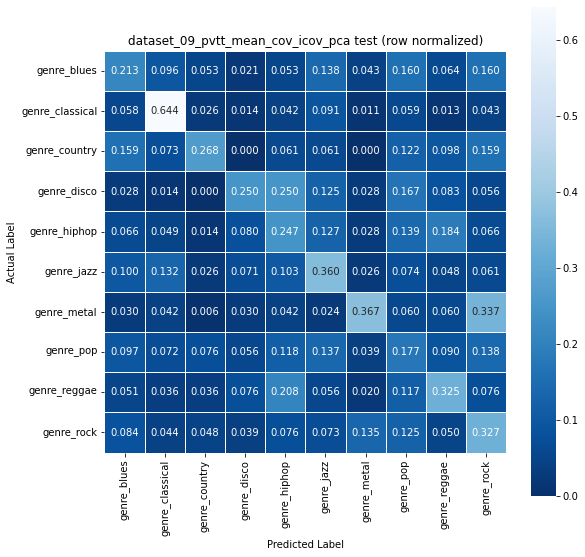



Commencing Experiment: DecisionTreeClassifier_dataset_10_melspectrograms_flattened

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.520375

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2162  0.7567    0.3363      374  0.3825
  genre_classical     0.7985  0.6939    0.7426     4221  0.6685
    genre_country     0.5940  0.7920    0.6789      327  0.6790
      genre_disco     0.2516  0.8097    0.3839      289  0.4367
     genre_hiphop     0.3399  0.4262    0.3782     1701  0.3031
       genre_jazz     0.3674  0.6060    0.4574     1241  0.4190
      genre_metal     0.4648  0.7338    0.5691      665  0.5634
        genre_pop     0.5865  0.3046    0.4010     4274  0.3001
     genre_reggae

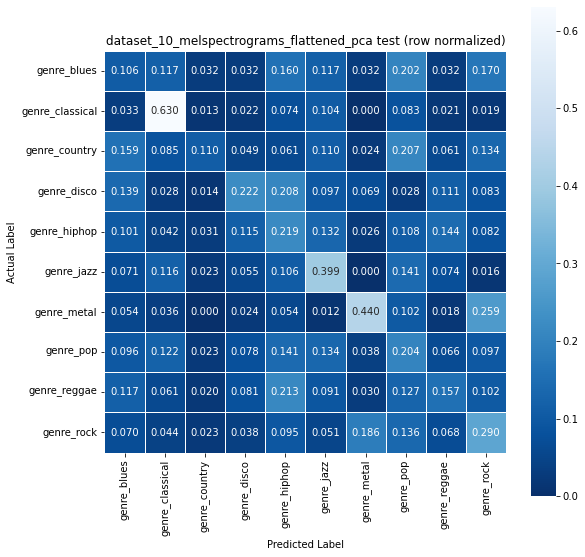

In [2]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

for dataset in datasets:
      
    if "spectrogram" in dataset:
        n_components = 2400
    else:
        n_components = .95        
    
    model = model = DecisionTreeClassifier(max_depth=12,
                                           min_samples_leaf=1,
                                           class_weight='balanced')
    experiment(model, dataset, pca_components=n_components, result_filename="rich_results.json")